## Diversification Limits

- Diversification is efficient for eliminating unrewarded risks, particularly specific or idiosyncratic risks.
- However, diversification has limits, especially in severe bear market conditions.
- Systematic risks (impacting all assets simultaneously) cannot be diversified away.

## Hedging:

- Hedging is introduced as a strategy to deal with systematic risk.
- While effective in providing downside protection, hedging is symmetric, meaning it sacrifices upside potential.

## Insurence as Dynamic Hedging:

- Insurance is presented as a solution that combines downside protection with the opportunity for upside potential.
- Dynamic hedging in insurance involves adjusting risk-taking based on the margin for error.


In [2]:
# Limits of Diversification                           
%load_ext autoreload
%autoreload 2
import edhec_risk as erk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
ind_return = erk.get_ind_returns()
ind_size = erk.get_ind_size()
ind_nfirms = erk.get_ind_nfirms()
ind_size.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,...,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,...,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,...,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21
1926-10,37.14,8.92,64.42,28.76,14.42,21.23,19.03,26.87,68.47,6.82,...,364.16,15.30,59.52,34.77,70.83,0.88,46.15,10.80,19.36,26.16
1926-11,35.88,8.62,65.08,27.38,15.79,20.14,19.03,26.54,65.06,6.84,...,363.74,14.89,58.74,32.80,68.75,0.74,45.03,10.33,18.35,23.94


### Computing Market Capitalization

In [12]:
# Market - Capitalization the value of a company that is traded on the stock market, calculated by multiplying the total number of shares by the present share price.
ind_mktCap = ind_nfirms * ind_size
ind_mktCap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


### Total Market Capitalization over the period of time

In [13]:
# Calculating the total market capitalization over the time

total_mktCap = ind_mktCap.sum(axis='columns')
total_mktCap

1926-07       26657.94
1926-08       27436.34
1926-09       28060.41
1926-10       28057.23
1926-11       27198.40
              ...     
2018-08    29949911.36
2018-09    30990177.46
2018-10    30918505.63
2018-11    28463290.74
2018-12    28851651.12
Freq: M, Length: 1110, dtype: float64

<Axes: >

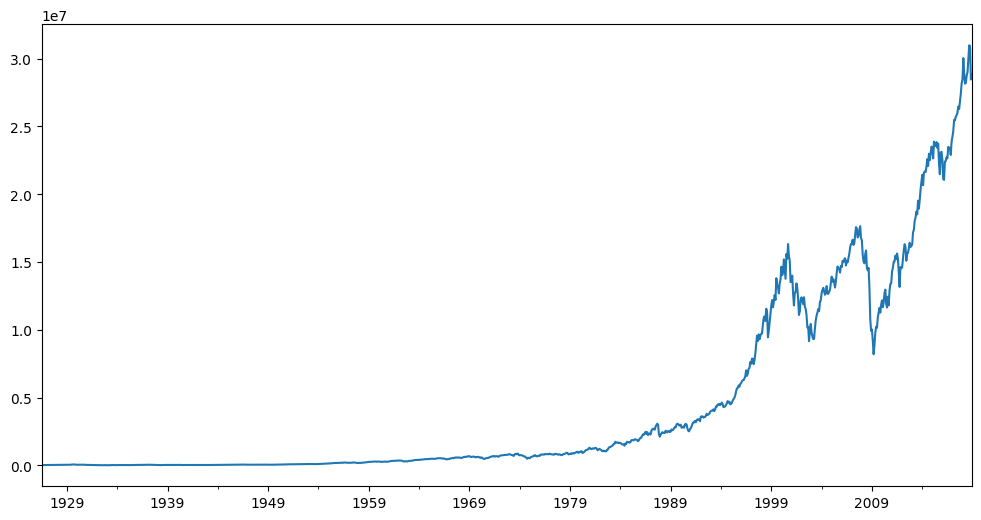

In [14]:
total_mktCap.plot(figsize=(12,6))

In [15]:
# Calculating how much each sector contributes to the Total Market Capitalization. Example: Food is 0.058037 which means
# it contribute to around 5 or 6% of the total market capitalization
ind_capWeight = ind_mktCap.divide(total_mktCap, axis="rows")
ind_capWeight

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,0.021873,0.008309,0.008222,0.011997,0.001168,0.014569,0.009720,0.103549,0.017596,0.000616,...,0.039896,0.161042,0.108402,0.010090,0.023453,0.010987,0.076225,0.014317,0.164637,0.047815
2018-09,0.021005,0.007873,0.007515,0.011923,0.001076,0.014427,0.009874,0.104324,0.016954,0.000618,...,0.039669,0.163597,0.114947,0.009675,0.023248,0.010992,0.080234,0.014275,0.162556,0.047549
2018-10,0.020661,0.007862,0.007831,0.011851,0.001052,0.014606,0.010000,0.106363,0.014954,0.000580,...,0.040434,0.163111,0.114711,0.009650,0.023535,0.010681,0.080886,0.014663,0.159464,0.048158
2018-11,0.022649,0.008403,0.009178,0.010810,0.001066,0.015702,0.009761,0.105080,0.014176,0.000467,...,0.043476,0.160187,0.114465,0.009333,0.023064,0.010674,0.078849,0.015642,0.161024,0.049159


<Axes: >

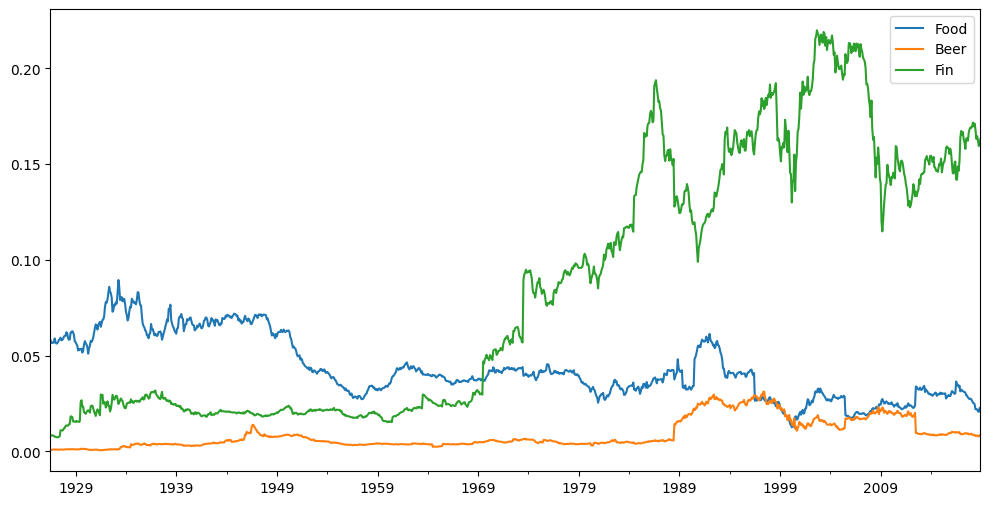

In [16]:
ind_capWeight[['Food', 'Beer', 'Fin']].plot(figsize=(12,6))

### Computing Total Market Returns

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
Freq: M, dtype: float64

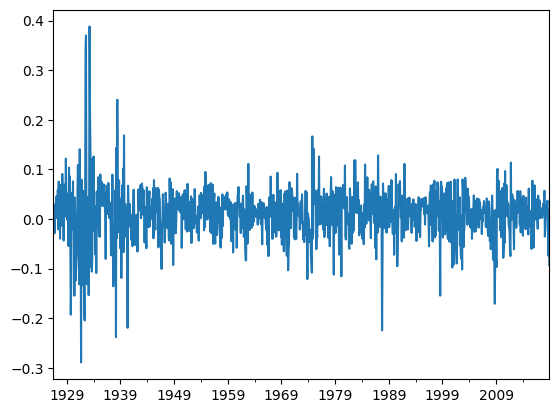

In [17]:
# Calculating the Total Market Returns for each period
total_market_return = (ind_capWeight * ind_return).sum(axis="columns")
total_market_return.plot()
total_market_return.head()


### Compute Total Market Wealth Index

1926-07    1031.375211
1926-08    1061.241004
1926-09    1067.147901
1926-10    1036.729633
1926-11    1065.798400
Freq: M, Name: Wealth, dtype: float64

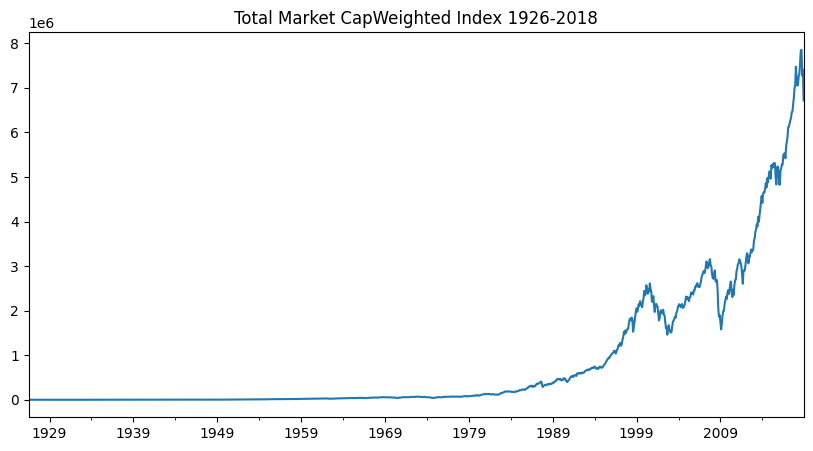

In [18]:

total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10,5), title= "Total Market CapWeighted Index 1926-2018")
total_market_index.head()

<Axes: >

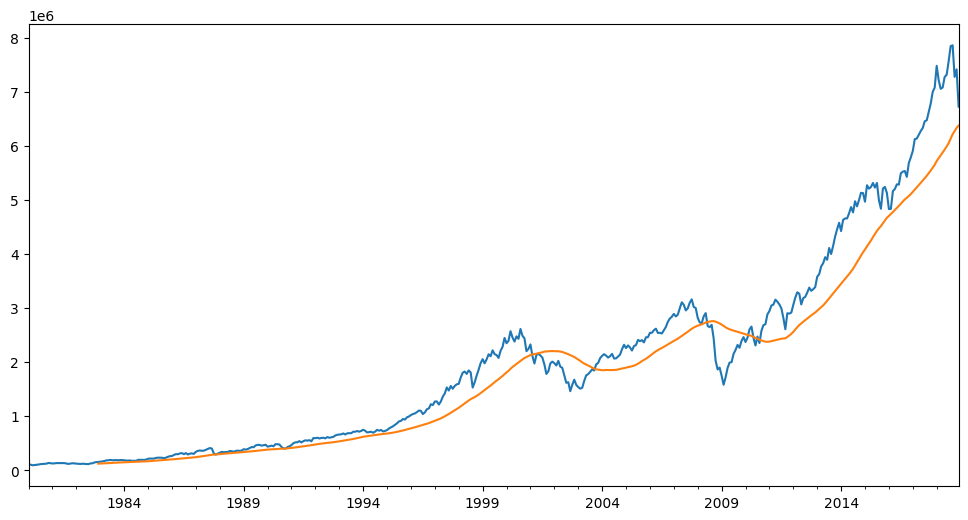

In [19]:
total_market_index["1980":].plot(figsize=(12,6))
# Plotting a trailing 36-month moving average of a total market index.
total_market_index["1980":].rolling(window = 36).mean().plot()

### Trailing 36 Months Returns

2018-08    0.162543
2018-09    0.175679
2018-10    0.117769
2018-11    0.122645
2018-12    0.094723
Freq: M, dtype: float64

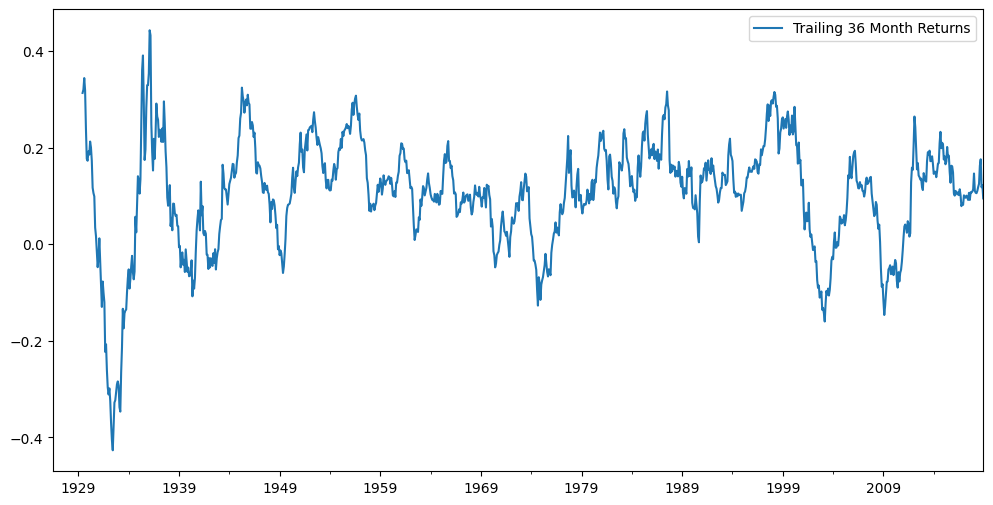

In [20]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, 12)
tmi_tr36rets.plot(figsize =(12,6), label = "Trailing 36 Month Returns", legend= True )
# total_market_return.plot(label= "Total Market Returns",legend = True)
tmi_tr36rets.tail()

## Relationship between avg Correlation and Returns over the time

### Rolling Correlation, along with MultiIndexes and .groupby

In [21]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr
# As you can see there are 2 indexes, one is the date and another is the name of the industries or sectors,
# thats why it is called multi-indexes.
# So according to the matrix, it says that in 2018-12 the correlation betn Food and Whlsl is 0.474948

Food      Beer     Smoke     Games     Books     Hshld  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
1926-07 Food        NaN       NaN       NaN       NaN  ...       NaN   
        Beer        NaN       NaN       NaN       NaN  ...       NaN   
        Smoke       NaN       NaN       NaN       NaN  ...       NaN   
        Games       NaN       NaN       NaN       NaN  ...       NaN   
        Books       NaN       NaN       NaN       NaN  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
1926-07 Food        NaN       NaN       NaN  
        Beer        NaN       NaN       NaN  
        Smoke       NaN       NaN       NaN  
        Games       NaN       NaN       NaN  
        Books       NaN       NaN       NaN  
...                 ...       ...       ...  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[33300 rows x 30 columns]

In [22]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

date
2018-08    0.416673
2018-09    0.401186
2018-10    0.409397
2018-11    0.403975
2018-12    0.479502
Freq: M, dtype: float64

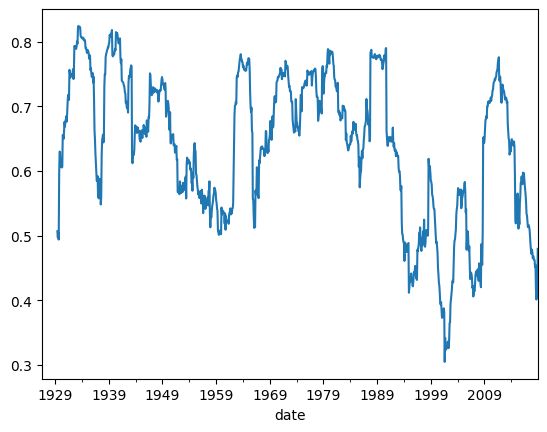

In [23]:
# Computing the avg Correlation of the industries over the time
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda corMat: corMat.values.mean())
ind_tr36corr.plot()
ind_tr36corr.tail()

<Axes: >

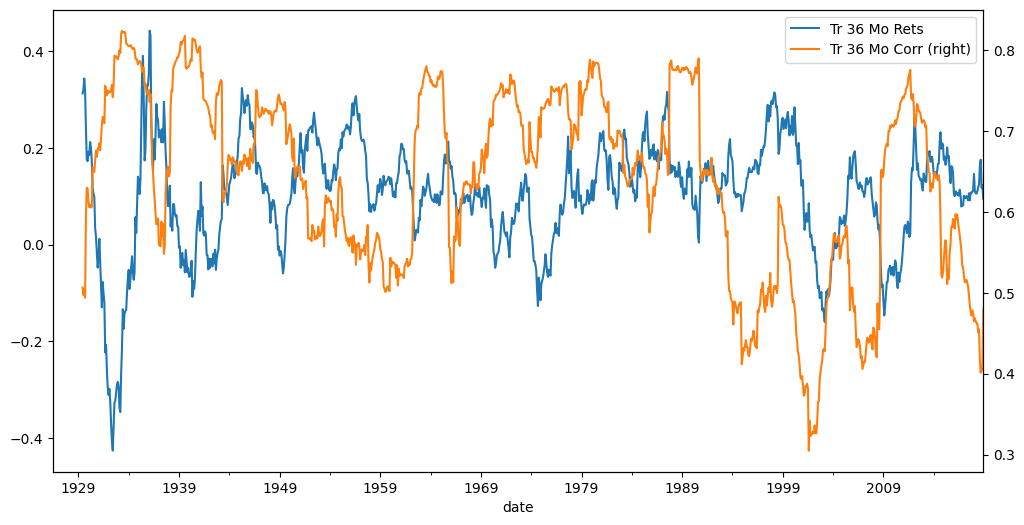

In [24]:
# ploting total market index of 36 months returns and correlation
tmi_tr36rets.plot(label="Tr 36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr.plot(label="Tr 36 Mo Corr", legend = True, secondary_y = True) # there will be Second Y-axis

# Here we can see when the market is falling Correlation is rising 
# and when the market is rising correlation is going to normal.
# But this is not always the case

In [25]:
# Correlation betn trailing 36 months returns and trailing 36 month correlation
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884026

## CPPI - Constant Proportion Portfolio Insurance

- You decide on a multiple (let's call it M) that determines how much of your money goes into risky assets.
- If your wealth is comfortably above the floor, you invest more in risky assets.
- As your wealth gets closer to the floor, you reduce the amount invested in risky assets to avoid going below the floor.
- The strategy(CPPI) aims to protect your floor while allowing for potential gains when things are going well.

**Example:**
- Let's say your current wealth is $100.
- If your floor is $80 and M is 3, then your "cushion" is $20 ([$100 - $80]).
- You'd invest 3 times the cushion in risky assets, so $60, and the rest, $40, in safe assets.

**Gap Risk:**
- Gap risk refers to the possibility of encountering losses that are larger than expected due to infrequent<br> or discrete trading in a financial strategy.

<div class="markdown prose w-full break-words dark:prose-invert dark"><p>Absolutely, let's simplify the concepts with examples:</p><h3>1. Protecting a Maximum Drawdown Floor</h3><h4>Objective:</h4><ul><li><strong>Goal:</strong> Avoid losing more than 20% of your portfolio value.</li></ul><h4>Approach:</h4><ol><li><p><strong>Running Max Process (<span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>M</mi><mo stretchy="false">(</mo><mi>t</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">M(t)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.10903em;">M</span><span class="mopen">(</span><span class="mord mathnormal">t</span><span class="mclose">)</span></span></span></span></span>):</strong></p><ul><li>Imagine you're always remembering the highest value your portfolio has ever reached.</li><li>If it ever falls below 80% of that highest value, you become cautious.</li></ul></li><li><p><strong>Allocation:</strong></p><ul><li>If your current portfolio value is below the 80% threshold, follow a rule (like CPPI) to decide how much to invest in risky assets.</li><li>This way, you're protecting yourself from significant losses.</li></ul></li></ol><h4>Example:</h4><ul><li>Imagine your highest portfolio value was $100.</li><li>If it ever drops below $80, you start adjusting your risky investments to prevent further losses.</li></ul><h3>2. Thresholds for Minimum and Maximum Wealth</h3><h4>Objective:</h4><ul><li><strong>Goal:</strong> Protect your portfolio from dropping below a certain level (floor) and going above a certain level (cap).</li></ul><h4>Approach:</h4><ol><li><p><strong>Threshold Level (<span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>T</mi><mo stretchy="false">(</mo><mi>t</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">T(t)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">T</span><span class="mopen">(</span><span class="mord mathnormal">t</span><span class="mclose">)</span></span></span></span></span>):</strong></p><ul><li>Define a middle ground between the floor and cap.</li><li>When your portfolio value is between this threshold and the cap, start becoming cautious to avoid going above the cap.</li></ul></li><li><p><strong>Allocation:</strong></p><ul><li>If your portfolio value is below the threshold, follow CPPI or a similar strategy.</li><li>If it's between the threshold and cap, adjust risky investments to prevent going above the cap.</li></ul></li></ol><h4>Example:</h4><ul><li>Your floor (minimum acceptable level) is $80, and your cap (maximum desirable level) is $120.</li><li>The threshold is the average: <span class="math math-inline"><span class="katex-error" title="ParseError: KaTeX parse error: Can't use function '$' in math mode at position 18: …0 + 120) / 2 = $̲100" style="color: rgb(204, 0, 0);">(80 + 120) / 2 = $100</span></span>.</li><li>If your portfolio value is below $100, you follow a strategy to protect from losses. If it's above, you start being cautious to avoid exceeding the cap.</li></ul><h3>Summary:</h3><ul><li>These strategies are like having a financial safety net.</li><li>You remember the best your portfolio has ever done and set rules to avoid going too far below or above certain levels.</li><li>It's a way to balance risk and reward based on your specific financial goals.</li></ul></div>


$$F_{t} ≤ A_{t} ≤ T_{t} => E_{t} = m(A_{t} -  F_{t}) \ --> \ Eq(1)$$
$$T_{t} ≤ A_{t} ≤ C_{t} => E_{t} = m(C_{t} -  A_{t})\ --> \ Eq(2)$$

$$F_{t} = \ Floor \ Value$$
$$A_{t} = \ Asset \ Value$$
$$C_{t} = \ Cap \ Value$$
$$T_{t} = \ Threshold \ Value$$

When the asset value is greater than Floor and less than Threshold value then use Eq(1) and if the asset value is greater than <br>
threshold value then use Eq(2). <br><br>

Formula for **Threshold Value**:
$$ T = \frac{F_{t} + C_{t}}{2}

## Random Walk Model and Monte Carlo Simulation


### 1. Asset in Focus:
- We're looking at two types of assets: one that's risky (like a stock market index) and one that's risk-free (like a government bond).

### 2. Modeling Returns:
- Imagine you have money invested in the stock market. The return you get is like a random walk, meaning it has a direction, but it also jumps around unpredictably.

### 3. Component of Risky Asset Return:
- The return on your investment has two parts:
    - **Certain Part (Deterministic):** This is the average or expected return. It's what you might predict based on historical data.
    - **Uncertain Part (Stochastic):** This is the unpredictable part, like when the market goes up or down unexpectedly. We model this uncertainty using something called Brownian Motion.

### 4. Decomposing Expected Return (mu):
- The expected return (mu) is like the average you'd expect to earn on your investment.
- We break it down into two things:
    - **Risk-Free Rate (r):** This is what you might get if you invested in something completely safe, like a government bond.
    - **Risk Premium (lambda times sigma):** This is an extra bit you get for taking on the risk of the stock market. It depends on how much the market tends to jump around (volatility).

### 5. Brownian Motion:
- Imagine the Brownian Motion as a random path. It's like watching a bug crawl around randomly on a piece of paper.
- This bug's movement represents the uncertainty in the stock market. It could go in any direction, but there's no pattern to its movement.

### 6. Simulation Approach:
- We can use this bug's random movement to simulate different scenarios for how the stock market might behave.
- Each step the bug takes is like a small moment in time, and we can do this many times to see different possible futures for the stock market.

### 7. Risk-Free Asset:
- If you invest in something completely safe (like a government bond), there's no uncertainty. You know exactly how much you'll get back.

$$ \frac{S_{t+dt} - S_{t}}{S_{t}} = \mu dt + \sigma \sqrt{dt} \ \epsilon_{t} $$

<ol><li><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mfrac><mrow><msub><mi>S</mi><mrow><mi>t</mi><mo>+</mo><mi>d</mi><mi>t</mi></mrow></msub><mo>−</mo><msub><mi>S</mi><mi>t</mi></msub></mrow><msub><mi>S</mi><mi>t</mi></msub></mfrac></mrow><annotation encoding="application/x-tex">\frac{S_{t+dt} - S_{t}}{S_{t}}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1.381em; vertical-align: -0.4451em;"></span><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.9359em;"><span style="top: -2.655em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight"><span class="mord mathnormal mtight" style="margin-right: 0.05764em;">S</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.2963em;"><span style="top: -2.357em; margin-left: -0.0576em; margin-right: 0.0714em;"><span class="pstrut" style="height: 2.5em;"></span><span class="sizing reset-size3 size1 mtight"><span class="mord mtight"><span class="mord mathnormal mtight">t</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.143em;"><span></span></span></span></span></span></span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.4575em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight"><span class="mord mathnormal mtight" style="margin-right: 0.05764em;">S</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3448em;"><span style="top: -2.3488em; margin-left: -0.0576em; margin-right: 0.0714em;"><span class="pstrut" style="height: 2.5em;"></span><span class="sizing reset-size3 size1 mtight"><span class="mord mtight"><span class="mord mathnormal mtight">t</span><span class="mbin mtight">+</span><span class="mord mathnormal mtight">d</span><span class="mord mathnormal mtight">t</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.2107em;"><span></span></span></span></span></span></span><span class="mbin mtight">−</span><span class="mord mtight"><span class="mord mathnormal mtight" style="margin-right: 0.05764em;">S</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.2963em;"><span style="top: -2.357em; margin-left: -0.0576em; margin-right: 0.0714em;"><span class="pstrut" style="height: 2.5em;"></span><span class="sizing reset-size3 size1 mtight"><span class="mord mtight"><span class="mord mathnormal mtight">t</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.143em;"><span></span></span></span></span></span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.4451em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span></span></span></span></span>: This is the return on the asset between time <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>t</mi></mrow><annotation encoding="application/x-tex">t</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6151em;"></span><span class="mord mathnormal">t</span></span></span></span></span> and <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>t</mi><mo>+</mo><mi>d</mi><mi>t</mi></mrow><annotation encoding="application/x-tex">t + dt</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6984em; vertical-align: -0.0833em;"></span><span class="mord mathnormal">t</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">+</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.6944em;"></span><span class="mord mathnormal">d</span><span class="mord mathnormal">t</span></span></span></span></span>. It represents how much the asset's value changes as a percentage of its current value.</p></li><li><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>μ</mi><mi>d</mi><mi>t</mi></mrow><annotation encoding="application/x-tex">\mu dt</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8889em; vertical-align: -0.1944em;"></span><span class="mord mathnormal">μ</span><span class="mord mathnormal">d</span><span class="mord mathnormal">t</span></span></span></span></span>: This is the deterministic (expected) part of the return. <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>μ</mi></mrow><annotation encoding="application/x-tex">\mu</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.625em; vertical-align: -0.1944em;"></span><span class="mord mathnormal">μ</span></span></span></span></span> is the average or expected return, and <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>d</mi><mi>t</mi></mrow><annotation encoding="application/x-tex">dt</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6944em;"></span><span class="mord mathnormal">d</span><span class="mord mathnormal">t</span></span></span></span></span> is a small time interval. So, <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>μ</mi><mi>d</mi><mi>t</mi></mrow><annotation encoding="application/x-tex">\mu dt</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8889em; vertical-align: -0.1944em;"></span><span class="mord mathnormal">μ</span><span class="mord mathnormal">d</span><span class="mord mathnormal">t</span></span></span></span></span> is the expected change in the asset's value due to some average rate of return.</p></li><li><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>σ</mi><msqrt><mrow><mi>d</mi><mi>t</mi></mrow></msqrt><mtext>&nbsp;</mtext><msub><mi>ϵ</mi><mi>t</mi></msub></mrow><annotation encoding="application/x-tex">\sigma \sqrt{dt} \ \epsilon_{t}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1.0822em; vertical-align: -0.15em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">σ</span><span class="mord sqrt"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.9322em;"><span class="svg-align" style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord" style="padding-left: 0.833em;"><span class="mord mathnormal">d</span><span class="mord mathnormal">t</span></span></span><span style="top: -2.8922em;"><span class="pstrut" style="height: 3em;"></span><span class="hide-tail" style="min-width: 0.853em; height: 1.08em;"><svg xmlns="http://www.w3.org/2000/svg" width="400em" height="1.08em" viewBox="0 0 400000 1080" preserveAspectRatio="xMinYMin slice"><path d="M95,702
c-2.7,0,-7.17,-2.7,-13.5,-8c-5.8,-5.3,-9.5,-10,-9.5,-14
c0,-2,0.3,-3.3,1,-4c1.3,-2.7,23.83,-20.7,67.5,-54
c44.2,-33.3,65.8,-50.3,66.5,-51c1.3,-1.3,3,-2,5,-2c4.7,0,8.7,3.3,12,10
s173,378,173,378c0.7,0,35.3,-71,104,-213c68.7,-142,137.5,-285,206.5,-429
c69,-144,104.5,-217.7,106.5,-221
l0 -0
c5.3,-9.3,12,-14,20,-14
H400000v40H845.2724
s-225.272,467,-225.272,467s-235,486,-235,486c-2.7,4.7,-9,7,-19,7
c-6,0,-10,-1,-12,-3s-194,-422,-194,-422s-65,47,-65,47z
M834 80h400000v40h-400000z"></path></svg></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.1078em;"><span></span></span></span></span></span><span class="mspace">&nbsp;</span><span class="mord"><span class="mord mathnormal">ϵ</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.2806em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mathnormal mtight">t</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span></span></span></span></span>: This is the stochastic (random) part of the return.</p><ul><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>σ</mi></mrow><annotation encoding="application/x-tex">\sigma</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.4306em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">σ</span></span></span></span></span> is the volatility of the asset, representing how much it tends to fluctuate.</li><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msqrt><mrow><mi>d</mi><mi>t</mi></mrow></msqrt></mrow><annotation encoding="application/x-tex">\sqrt{dt}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1.04em; vertical-align: -0.1078em;"></span><span class="mord sqrt"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.9322em;"><span class="svg-align" style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord" style="padding-left: 0.833em;"><span class="mord mathnormal">d</span><span class="mord mathnormal">t</span></span></span><span style="top: -2.8922em;"><span class="pstrut" style="height: 3em;"></span><span class="hide-tail" style="min-width: 0.853em; height: 1.08em;"><svg xmlns="http://www.w3.org/2000/svg" width="400em" height="1.08em" viewBox="0 0 400000 1080" preserveAspectRatio="xMinYMin slice"><path d="M95,702
c-2.7,0,-7.17,-2.7,-13.5,-8c-5.8,-5.3,-9.5,-10,-9.5,-14
c0,-2,0.3,-3.3,1,-4c1.3,-2.7,23.83,-20.7,67.5,-54
c44.2,-33.3,65.8,-50.3,66.5,-51c1.3,-1.3,3,-2,5,-2c4.7,0,8.7,3.3,12,10
s173,378,173,378c0.7,0,35.3,-71,104,-213c68.7,-142,137.5,-285,206.5,-429
c69,-144,104.5,-217.7,106.5,-221
l0 -0
c5.3,-9.3,12,-14,20,-14
H400000v40H845.2724
s-225.272,467,-225.272,467s-235,486,-235,486c-2.7,4.7,-9,7,-19,7
c-6,0,-10,-1,-12,-3s-194,-422,-194,-422s-65,47,-65,47z
M834 80h400000v40h-400000z"></path></svg></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.1078em;"><span></span></span></span></span></span></span></span></span></span> is the square root of the time interval, and it's there to scale the randomness appropriately.</li><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>ϵ</mi><mi>t</mi></msub></mrow><annotation encoding="application/x-tex">\epsilon_{t}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.5806em; vertical-align: -0.15em;"></span><span class="mord"><span class="mord mathnormal">ϵ</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.2806em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mathnormal mtight">t</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span></span></span></span></span> is a random variable that follows a standard normal distribution (mean 0, variance 1). It represents the random "shocks" or unpredictable changes in the asset's value.</li></ul></li></ol>


In [9]:
import ipywidgets as widegets
from IPython.display import display
import pandas as pd
import edhec_risk as erk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/popeye/Anchorblock/Trading_With_Python/edhec_risk.py:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
/home/popeye/Anchorblock/Trading_With_Python/edhec_risk.py:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
/home/popeye/Anchorblock/Trading_With_Python/edhec_risk.py:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


<Axes: >

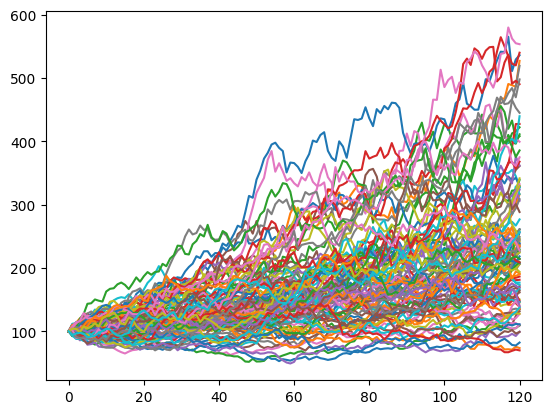

In [12]:
erk.gbm(10, 100, mu=0.1).plot(legend=False)